In [13]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from ipywidgets import interact, FloatSlider
from math import pi, atan, cos, sin, tan, sqrt, radians, degrees
import os
import sys
sys.path.append(os.path.abspath("../../.."))
from assets.modules.snow import *

In [14]:
Is = np.array([0.8, 1.0, 1.1, 1.2])
Pg = np.arange(5, 101, 1)  # psf
lu = np.array([20, 50, 100, 200, 400, 600]) # ft
W2 = np.arange(0.1, 1.01, 0.1)

In [15]:
hd_asce716 = asce_7_16_drift_height(Is[:, None], Pg[None, :], lu[None, :])
hd_asce722 = asce_7_22_drift_height(Pg[None, :], lu[None, :], W2[None, :])

(96, 6) (96, 6)


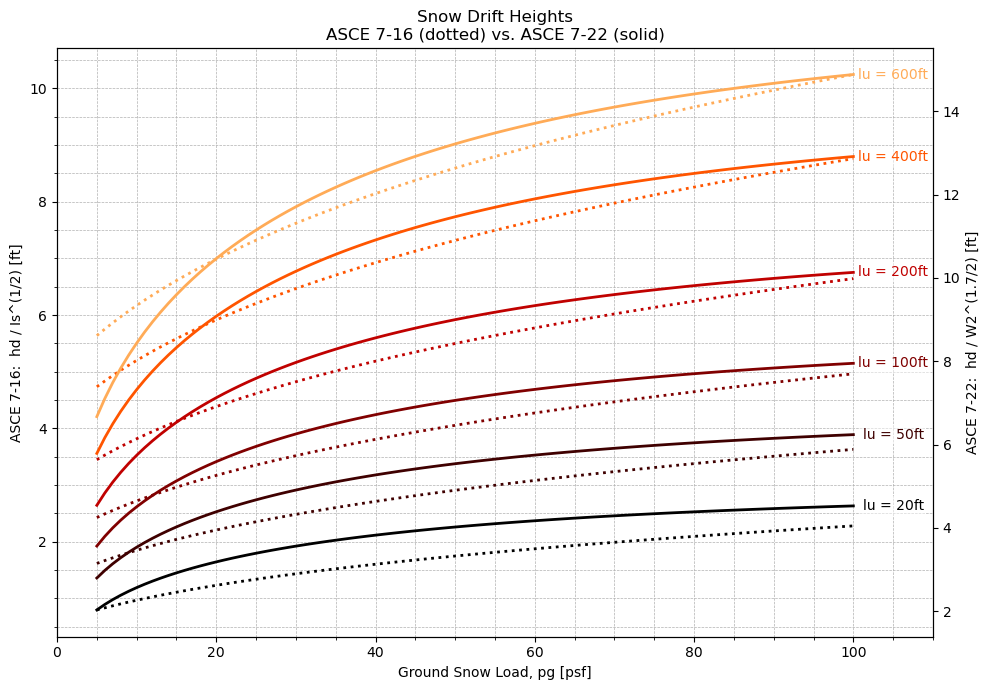

In [29]:
# normalize ASCE 7-16 drift heights
Is_broadcast = Is.reshape(-1, 1, 1)
hd716_div = hd_asce716 / np.sqrt(Is_broadcast)
hd716_plot = hd716_div[0, :, :]         # (n_Pg, n_lu)

# normalize ASCE 7-22 drift heights
W2_broadcast = W2.reshape(1, 1, -1)
hd722_div = hd_asce722 / np.power(W2_broadcast, 1.7/2)
hd722_plot = hd722_div[:, :, 0]   # (n_Pg, n_lu)
print(hd716_plot.shape, hd722_plot.shape)
plt.figure(figsize=(10, 7))
plt.minorticks_on()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

ax: Axes = plt.gca()
ax2 = ax.twinx()

cmap = plt.cm.gist_heat
colors = cmap(np.linspace(0, 1, len(lu)+1))

for j, L in enumerate(lu):
    y16 = hd716_plot[:, j]       # ASCE 7-16
    y22 = hd722_plot[:, j]    # ASCE 7-22

    ax.plot(Pg, y16, linestyle=":", color=colors[j], linewidth=2)
    ax2.plot(Pg, y22, linestyle="-", color=colors[j], linewidth=2)

    x_pos = 1.05*Pg[-1]
    y_pos = y22[-1]

    ax2.text(
        x_pos, y_pos,
        f"lu = {L}ft",
        color=colors[j],
        fontsize=10,
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.5, edgecolor='none', pad=2)
    )

ax.set_xlabel("Ground Snow Load, pg [psf]")
ax.set_ylabel("ASCE 7-16:  hd / Is^(1/2) [ft]")
ax2.set_ylabel("ASCE 7-22:  hd / W2^(1.7/2) [ft]")
ax.set_xlim(0, 1.1*Pg[-1])

plt.title("Snow Drift Heights\nASCE 7-16 (dotted) vs. ASCE 7-22 (solid)")
plt.tight_layout()
plt.show()
